# (1)뉴스 카테고리 다중분류용 데이터 다운로드

In [70]:
# 패키지 임포트
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [71]:
# 훈련데이터와 테스트데이터 로드 (로이터 뉴스)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
# num_words는 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절
# 단어들은 등장 빈도수가 높은 순서대로 낮은 정수가 맵핑 / 등장 빈도수가 높은 단어들만 사용하겠다는 의미
# 

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [72]:
# 훈련데이터와 테스트데이터 개수 확인
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [73]:
# 학습데이터와 테스트데이터에서 하나씩 출력해보기
print(x_train[0])
print(x_test[0])

# 실제 출력해보면 텍스트가 아니라 숫자 시퀀스가 출력
# 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [74]:
# 타겟데이터(학습/테스트) 출력
print(y_train[0])
print(y_test[0])

# 각 뉴스는 정수로 된 레이블
# 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하면 현재 클래스의 개수

3
3


In [75]:
# 클래스의 개수
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


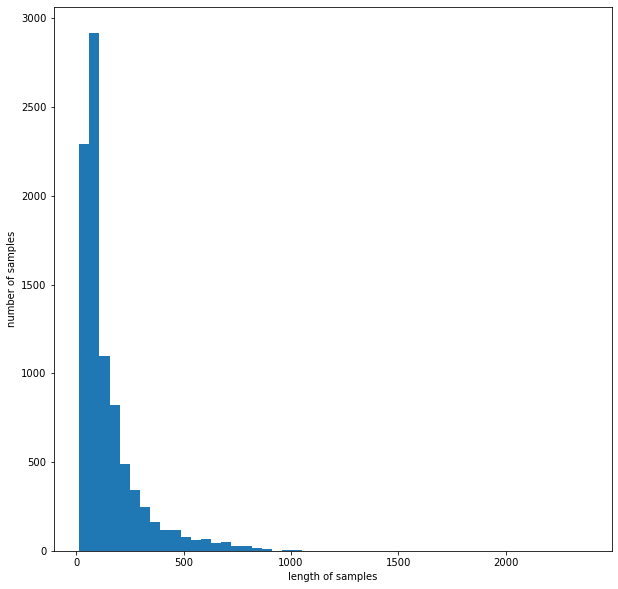

In [76]:
# 데이터 분포 확인
# 자연어 처리 과정에서 문장, 문서들의 길이는 보통 다름
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

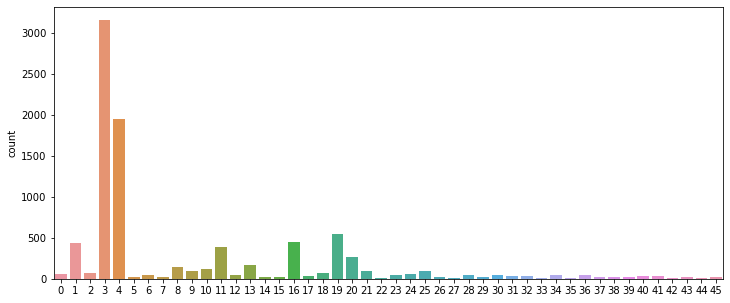

In [77]:
# 클래스의 분포 확인
# 모델의 성능에 영향을 줄 수 있는 요소이기 때문에 실제로 모든 클래스가 다 존재는 하는 것인지, 
# 어떤 클래스가 유독 많은지, 이런 것들을 사전에 확인
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

# 대부분의 클래스가 3과 4에 몰려있다.

In [78]:
# 수치로 클래스 분포 파악
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
# print(np.asarray((unique_elements, counts_elements)))
for x in range(len(unique_elements)):
    print(unique_elements[x], " : ", end="")
    print(counts_elements[x])
    
# 대부분의 클래스가 3과 4에 몰려있다.

각 클래스 빈도수:
0  : 55
1  : 432
2  : 74
3  : 3159
4  : 1949
5  : 17
6  : 48
7  : 16
8  : 139
9  : 101
10  : 124
11  : 390
12  : 49
13  : 172
14  : 26
15  : 20
16  : 444
17  : 39
18  : 66
19  : 549
20  : 269
21  : 100
22  : 15
23  : 41
24  : 62
25  : 92
26  : 24
27  : 15
28  : 48
29  : 19
30  : 45
31  : 39
32  : 32
33  : 11
34  : 50
35  : 10
36  : 49
37  : 19
38  : 19
39  : 24
40  : 36
41  : 30
42  : 13
43  : 21
44  : 12
45  : 18


# (2) 데이터 복원하기

In [79]:
# 수치형 데이터를 텍스트 데이터로 복원

# 단어장 형성
word_index = reuters.get_word_index(path="reuters_word_index.json") # get_word_index는 메서드가 미리 만들어져있는 듯

In [80]:
# 특정 단어의 인덱스 출력
word_index['the']

1

In [81]:
# 특정 단어의 인덱스 출력
word_index['it']

13

In [82]:
# 데이터에는 숨겨진 비밀
# 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어
# 얻는 숫자보다는 +3을 한 숫자가 원래 고유한 숫자
# 로이터 뉴스 데이터가 정의한 일종의 약속
# reuters.get_word_index에는 실제 단어에 맵핑한 정수에 -3을 한 정수를 입력
# 그렇기 때문에 word_index에서 index_word를 만들 때, 각 정수에 +3을 해주어야 함

index_to_word = {index + 3 : word for word, index in word_index.items()} # index에 3 더해주기

In [83]:
print(index_to_word[4]) # the
print(index_to_word[16]) # it

the
it


In [84]:
# 0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑되어진 번호
# 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [85]:
# 이제 수치형데이터를 텍스트데이터로 변환!!
# 첫번째 데이터 출력
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [86]:
# OOV 문제와 UNK 토큰

# 기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)
# 배우지 못한 모르는 단어가 등장하게 되면 이 단어를 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown)이라고 표현
# 학습데이터에 없으나 테스트데이터에 있는 경우 발생할 수 있음
# 어떤 단어가 기계가 모르는 단어로 판단되면, 
# 기계는 해당 단어를 전부 <unk>라는 일관된 특별 토큰으로 변환하는 식으로 처리


# 첫 코드에서 num_words = 10000는 사실 정수 번호가 10,000이 넘는 단어들을 자동으로 <unk> 토큰으로 처리

# 문제
# [4, 587, 23, 133, 6, 30, 515]를 텍스트 시퀀스로 변환

# 시도 코드
test = [4, 587, 23, 133, 6, 30, 515]
change = []
for x in test :
    change.append(index_to_word[x])

string = " ".join(change)
print(string)


# 정답 코드
# print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))

print()
# 하지만 test에 10000이 넘어가는 데이터가 끼게 되면 해당 데이터는 oov를 의미하는 1로 변환되어 출력된다???
# 예시
print("12000 넣었을 때 :",' '.join([index_to_word[index] for index in [4, 12000, 23, 133, 6, 30, 515]]))
print()
print("1 넣었을 때 :",' '.join([index_to_word[index] for index in [4, 1, 23, 133, 6, 30, 515]]))

the transaction is expected to be completed

12000 넣었을 때 : the staffing is expected to be completed

1 넣었을 때 : the <sos> is expected to be completed


In [18]:
# 전체 훈련된 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트로 변환

# 학습데이터 디코딩
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [19]:
# 테스트데이터 디코딩
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [20]:
# 변환 확인
print(x_train[:5])
print(x_test[:5])

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3', '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one

# (3) 벡터화 하기

In [21]:
# 필요한 도구 임포트
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [22]:
# 이번 실습에서는 딥러닝이 아닌 머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정
# 벡터화 방법도 인공 신경망이 아닌 방법을 사용
# 벡터화 방법은 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬

# DTM(Document Term Matrix)은 사이킷런의 CountVectorizer()를 통해서 생성할 수 있음
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train) # fit_transform() 메서드 활용
print(x_train_dtm.shape)

# DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거했기 때문에 10000이 아닌 9670
# 훈련샘플 수는 8982 그대로

(8982, 9670)


In [23]:
# TF-IDF 행렬은 퀴즈 4에서 알아본 DTM의 단점을 보정해주는 효과
# TF-IDF는 단어의 빈도와 역 문서 빈도를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
# TF-IDF는 TF와 IDF를 곱한 값을 의미

# (1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.
# (2) df(t) : 특정 단어 t가 등장한 문서의 수.
# (3) idf(d, t) : df(t)에 반비례하는 수.

# idf(d,t)=log(n / 1+df(t))
# idf(문서, 단어) = log(문서의 총 개수 / 1 + t가 등장한 문서의 수)

# TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성할 수 있다
# TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)


(8982, 9670)


# (4) 나이브 베이즈 분류기

In [24]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [25]:
# 나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용가능
# fit()이라는 함수를 통해 학습 가능

mod = MultinomialNB()
mod.fit(tfidfv, y_train) # 학습 데이터는 TF-IDF Matrix

MultinomialNB()

In [26]:
# 테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련 데이터와 동일한 전처리를 진행해야 함
# 테스트 데이터도 TF-IDF 행렬로 변환
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [27]:
# predict() 함수를 통해 예측값을 얻어 정확도를 측정

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [28]:
# 정확히 예측하는지 확인을 위해 특정 샘플을 뽑아 확인
print("학습 샘플 : ", x_test[3])
print("타겟 샘플 : ", y_test[3])

학습 샘플 :  <sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3
타겟 샘플 :  4


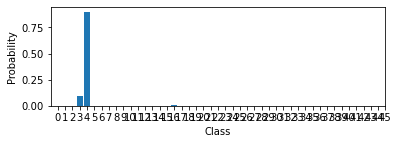

In [29]:
# 제대로 예측했는지 확인
plt.subplot(211)
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(mod.classes_, mod.predict_proba(tfidfv_test[3])[0])
plt.xlim(-1, 21)
plt.xticks(mod.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

# 4번 클래스를 약 90%의 확률로 확신, 10%의 확률로 3번 클래스

In [30]:
mod.predict(tfidfv_test[3])

array([4])

# (5) F1-Score, Confusion Matrix

In [31]:
# 실습에서는 성능 비교를 위한 척도로 정확도(Accuracy)를 사용
# 하지만 Accuracy 외에 또 다른 방법인 F1-score도 존재

In [32]:
# F1 Score 측정을 위한 패키지 임포트
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 분류성능평가지표 정리

1) Precision(정밀도)
- 정밀도란 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율   

2) Recall(재현율)
- 재현율이란 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율

3) Accuracy(정확도)
- 정확도란 전체 중 (True라고 분류한 것 중에 실제True + False라고 분류한 것 중에 실제 False)의 비율 

4) F1 Score(Precision과 Recall의 조화평균)


In [33]:
# 사이킷런의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공
# 이 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 
# 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가
print(classification_report(y_test, mod.predict(tfidfv_test)))  # 

# 최종 결과에서 의미하는 바

# macro: 단순평균
# weighted: 각 클래스에 속하는 표본의 개수로 가중평균
# accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# (6) 다양한 머신러닝 모델 사용해보기

### 1. Complement Naive Bayes Classifier(CNB)

나이브 베이지안 분류기는 조건부로 독립적이라는 가정을 하기 때문에, 문서가 특정 분류에 속할 실제 확률로 사용할 때 문제가 발생가능    
바로 많은 샘플(sample)이 특정 클래스에 치우쳐져 있을 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호할 수 있다는 점    
데이터가 불균형할 경우를 대비해서 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기    
컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징    
컴플리먼트 나이브 베이즈 분류기는 앞서 사용한 나이브 베이즈 분류기 즉, MultinomialNB보다 성능이 일반적으로 더 좋다    

In [34]:
cb = ComplementNB()
cb.fit(tfidfv, y_train) # 학습 데이터는 TF-IDF Matrix

ComplementNB()

In [35]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


### 2. 로지스틱 회귀(Logistic Regression)
두 개의 선형 분류 알고리즘인 로지스틱 회귀   
로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원   
다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 함    
소프트맥스 함수는 클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수   
사이킷런에서 소프트맥스 회귀는 LogisticRegression()을 통해서 구현

In [36]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train) # 학습 데이터는 TF-IDF Matrix

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [37]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8076580587711487


### 3. 선형 서포트 벡터 머신
선형 분류 모델은 태생적으로는 이진 분류만을 지원하는 이진 분류 모델(로지스틱 회귀는 예외)   
서포트 벡터 머신의 구현체인 사이킷런의 LinearSVC 또한 태생적으로는 이진 분류를 위한 모델    
이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있음    
바로 일대다(one-vs.-rest 또는 one-vs.-all) 방법    
일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습     
클래스의 수만큼 이진 분류 모델이 만들어짐    
예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택

In [38]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train) # 학습 데이터는 TF-IDF Matrix

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [39]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7813891362422084


### 4. 결정 트리(Decision Tree)
결정 트리는 분류와 회귀 문제에 널리 사용하는 모델    
기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습    
사이킷런에서는 DecisionTreeClassifier()를 사용해서 결정 트리를 구현    
결정 트리의 깊이는 max_depth라는 인자를 통해서 정해줄 수 있음    

In [40]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train) # 학습 데이터는 TF-IDF Matrix

DecisionTreeClassifier(max_depth=10, random_state=0)

In [41]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


### 5. 랜덤 포레스트(Random Forest)
앙상블(Ensemble)이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법    
모델 자체가 앙상블을 사용하는 앙상블 모델들도 존재     
랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델    
결정 트리는 훈련 데이터에 과적합(Overfitting) 되는 경향    
랜덤 포레스트는 이 문제를 앙상블로 해결    
서로 다른 방향으로 과적합 된 트리들을 조합하면 오히려 모델 전체에서는 과적합을 피할 수 있음

In [42]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train) # 학습 데이터는 TF-IDF Matrix

RandomForestClassifier(n_estimators=5, random_state=0)

In [43]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


### 6. 그래디언트 부스팅 트리(GradientBoostingClassifier)
그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델    
랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦    
그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징    
보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도    

일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠름    
정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델    
다만, 훈련 시간의 속도가 좀 오래 걸린다는 단점이 있으며      
트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점도 존재    

In [47]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train) # 학습 데이터는 TF-IDF Matrix

GradientBoostingClassifier(random_state=0)

In [48]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7666963490650045


### 7. 보팅(Voting)
투표를 통해 결과를 도출하는 보팅(Voting)    
voting기법 중 소프트 보팅은 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종값을 도출    

In [49]:
# 이전에 사용했던 모델인 로지스틱 회귀, CNB, 그래디언트 부스팅 트리 세 가지를 사용하여 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [50]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8116651825467498
